$$ 
\hat{y} = \frac{1}{1 + e^{-z}} 
$$

Gradient Descent

$w_2 = w - \alpha \cdot dw$

$b_2 = b - \alpha \cdot db$


$w_2$  = updated weight

w = previous weight


$\alpha$  = learning rate


For Bias

$b_2$ = updated bias 


b = previous bias

$$ 
dw = \frac{1}{m} + (\hat{Y} - Y) \cdot X 
$$$$$$$$$$

$$ 
db = \frac{1}{m} + (\hat{Y} - Y) \cdot X 
$$

In [5]:
import numpy as np

class Logistic_Regression():
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
    #Declaring learning rate and number of iteration (Hyperparameters)
           
#=====================End of Step one =============================#
    

#=====================Step two starts here =============================#
    #The purpose of the fit function is fitting our data to Logistic Regression model to be train
    def fit(self, x, y):
        self.m, self.n = x.shape      # m = numbers of rows and n = total number of columns

        self.w = np.zeros(self.n)
        self.b = 0
        self.x = x   #features of the data
        self.y = y   #target(Outcome) column in the dataset
        
        #implementing Gradient Descent for optimization

        for i in range(self.no_of_iterations):
            self.updated_weights()  

#=====================End of Step two =============================#
    

#=====================Step three starts here =============================# 

    def updated_weights(self):
        
       # y_cap = 1/(1+np.exp(-z))  # z = w.x + b   #
        y_cap = 1 / (1 + np.exp( - (self.x.dot(self.w) + self.b)))  #this equation is similar to  y_cap = 1/(1+np.exp(-z))  where z = w.x + b   #
        
        #where w and x are arrays but b is a single integer values
       
        #exp = e which is the Euler's number = 2.718
    
        # to get the Eulers's number in jupyternotebook  print(np.exp(1))

        #replacing -z with its parameters.
    

    #Building the Derivatives         
        
        dw = (1/self.m)*np.dot(self.x.T, (y_cap - self.y))
            
    # y_cap is the predicted value
    # y is the true value (outcome column)
        
        db = (1/self.m)*np.sum (y_cap - self.y)
        
    #updating the weights and bias using Gradient Descent      
        
        self.w = self.w - self.learning_rate * dw 
        
        self.b = self.b  - self.learning_rate * db

    
#=====================End of Step three =============================#


    def predict(self, x):  # to find the value of y

        y_pred = 1 / (1 + np.exp( - (x.dot(self.w) + self.b )))    #we can't use self.x again because we are using a new x to predict the value of y 

        y_pred = np.where (y_pred > 0.5, 1, 0)

        return(y_pred)

In [6]:
#Importing the libraries

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# import Log_Reg


In [7]:
#Importing the data
df = pd.read_csv('heart.csv')

In [8]:
#Top five rows 
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
#Columns and rows
df.shape

(303, 14)

In [10]:
#Stats of the data
df.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


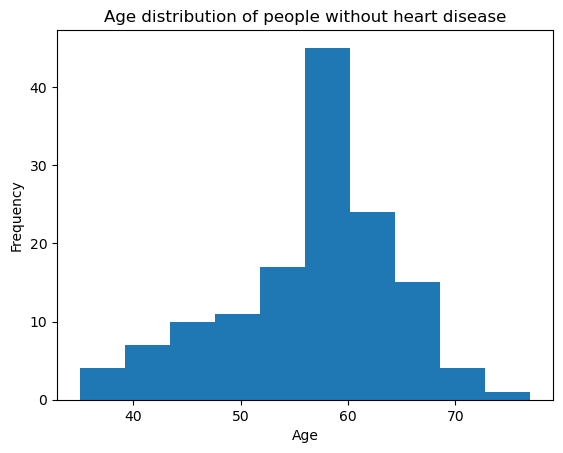

In [11]:
plt.hist(df[df['target']==0]['age'], bins = 10)
plt.title('Age distribution of people without heart disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

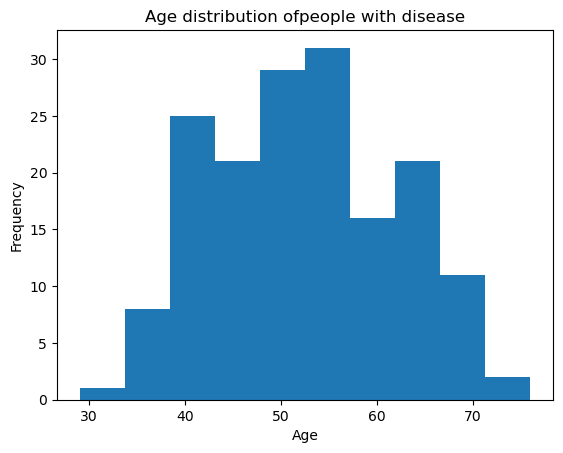

In [21]:
plt.hist(df[df['target']==1]['age'], bins = 10)
plt.title('Age distribution ofpeople with disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [23]:
#Correlation
correlation = df.iloc[:,0:13].corr()

correlation

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041
chest_pain_type,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
resting_bp,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
cholestoral,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
max_hr,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244


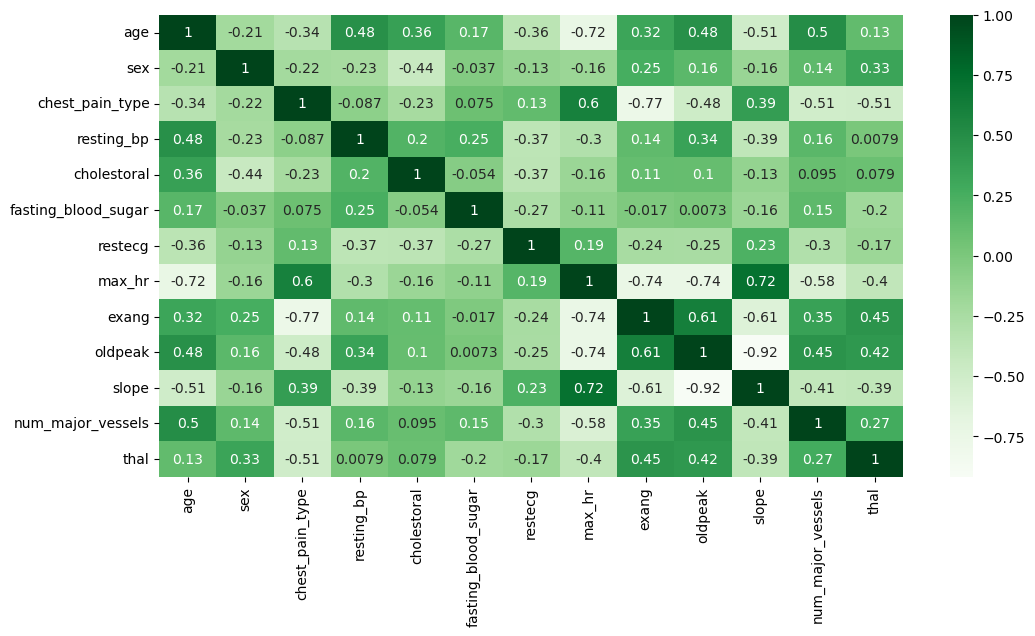

In [24]:
 #heatmap showing the correlation between two variables
plt.figure(figsize=(12, 6))
sns.heatmap(correlation.corr(numeric_only=True).iloc[:,0:13], annot=True, cmap='Greens');

In [26]:
#number of disease and no-disease patients
#  0 = No heart disease
#  1 = Yes heart disease

In [27]:
#Mean value of the dataset by heart disease and non no heart disease groupby 'target'
df.groupby('target').mean()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [28]:
#Seperating features from label. x= features, y = target
x = df.drop(columns = 'target', axis = 1)
y = df['target']

In [29]:
print(x)

     age  sex  chest_pain_type  resting_bp  cholestoral  fasting_blood_sugar  \
0     63    1                3         145          233                    1   
1     37    1                2         130          250                    0   
2     41    0                1         130          204                    0   
3     56    1                1         120          236                    0   
4     57    0                0         120          354                    0   
..   ...  ...              ...         ...          ...                  ...   
298   57    0                0         140          241                    0   
299   45    1                3         110          264                    0   
300   68    1                0         144          193                    1   
301   57    1                0         130          131                    0   
302   57    0                1         130          236                    0   

     restecg  max_hr  exang  oldpeak  s

In [30]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Data Standardaization

In [38]:
#Data standardization; to convert the values to a common range between 0 & 1 for our ML prediction we use the function.
scaler = StandardScaler()

In [40]:
#Fitting the 'x' data
scaler.fit(x)

StandardScaler()

In [42]:
#Transforming the 'x' data
standardized_data = scaler.transform(x)

In [44]:
x = standardized_data
y = df['target']

In [46]:
print(x)
print(y)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Train Test Split

In [49]:
# test_size 0.2 = 20% data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, stratify=y, random_state = 2)

In [51]:
print(x.shape, x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


Training the Model

In [54]:
#Training the model, by calling the Logistic_Regression I built and assigning parameters
classifier = Logistic_Regression(learning_rate=0.01, no_of_iterations=1000)

In [56]:
#Fitting the training data into the classifier
# x_training is the features and y_train is the label
classifier.fit(x_train, y_train)

Model Evaluation

X_Train Accuracy Score

In [60]:
#Evaluating the model to know the training data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

In [62]:
#Accuracy score of the train data

print('Accuracy score of the training data is:', training_data_accuracy)
print('Accuracy Score of training data:', training_data_accuracy)

Accuracy score of the training data is: 0.8471074380165289
Accuracy Score of training data: 0.8471074380165289


X_Test Accuracy Score

In [65]:
#Evaluating the model to know the test data
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)

In [67]:
print('Accuracy Score of the test data:', test_data_accuracy)

Accuracy Score of the test data: 0.8032786885245902


The Predictive System

In [70]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

#Input data from the dataset
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1)

#Changing the input data to numpy arrray for efficient
input_data_as_numpy = np.asarray(input_data)

reshape_input_data = input_data_as_numpy.reshape(1, -1)

#Standardizing the data before predicting the outcome 
standardized_data = scaler.transform(reshape_input_data)
print(standardized_data)

prediction = classifier.predict(standardized_data)
print(prediction)

if prediction [0] == 0:
    print('The person do not have any heart disease')

else:
    print('The person has heart disease')

[[ 0.9521966   0.68100522  1.97312292  0.76395577 -0.25633371  2.394438
  -1.00583187  0.01544279 -0.69663055  1.08733806 -2.27457861 -0.71442887
  -2.14887271]]
[1]
The person has heart disease


In [72]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


input_data = (67,1,0,160,286,0,0,108,1,1.5,1,3,2)

input_data_as_numpy = np.asarray(input_data)

reshape_input_data = input_data_as_numpy.reshape(1, -1)

#Standardizing the data before predicting the outcome 
standardized_data = scaler.transform(reshape_input_data)
print(standardized_data)

prediction = classifier.predict(standardized_data)
print(prediction)

if prediction [0] == 0:
    print('The person do not have any heart disease')

else:
    print('The person has heart disease')

[[ 1.39335191  0.68100522 -0.93851463  1.62064933  0.76791685 -0.41763453
  -1.00583187 -1.82123842  1.43548113  0.39718162 -0.64911323  2.22410436
  -0.51292188]]
[0]
The person do not have any heart disease


In [75]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')

In [79]:
df

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
